In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
import csv
sentences = []
with open("/tmp/puisi_proc.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  row_length=len(row)
  for i in range(row_length):
    if row[i] !='':
      row[i].lower().split('\n')
      sentences.append(row[i])
      
    
    

In [ ]:
print (sentences[0])
#corpus = sentences[0].lower().split("\n")
print(len(sentences[0]))



Ibu. 
 Pengorbananmu adalah suatu cerminan bagiku, 
 Keiklasan mu Suatu pegangan yang tak ternilai harganya bagiku, 
 Butiran dan tetesan Air matamu adalah Mutiara Yang berharga dalam hati,benak 
 jiwa dan ragaku, 
 Apakah 
 yang bisa ku lakukan untuk membalas semua kebaikanmu yang pernah 
 memperjuangkan jiwa dan ragamu hanya karna engkau menginginkan aku 
 barnafas didunia ini 
 apa yang bisa ku perbuat untuk membayar segala 
 perjuangan mu selama ini,. 
 IBU, 
 Kini engkau telah pergi meninggalkan aku, 
 Apakah hanya dengan air mata, 
 Apakah hanya dengan jeritan agar aku bisa membalas pengorbanan dan kesetianmu kepadaku, 
 IBU, 
 Betapa engkau sangat menyayangi aku 
 ketika engkau telah menutup mata, 
 Katika aku tak melihat senyum manis dari bibirmu, 
 Ketika aku tak mendengar suaramu memanggil aku dengan kata kata sayang dari dalam hatimu 
 ketika aku tak merasakan hangatnya belaian dan pelukan hangat kasih sayangmu kepadaku, 
 Aku hancur bagaikan pecahan logam yang tak ada harga

In [ ]:
tokenizer = Tokenizer()


tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2,activation='relu',kernel_regularizer=regularizers.l2(0.05)))# A Dense Layer including regularizers)
model.add(Dense(total_words,activation='softmax'))# A Dense Layer)
# Pick an optimizer
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer= adam,metrics=['acc'])# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 262, 64)           9152      
_________________________________________________________________
bidirectional (Bidirectional (None, 262, 300)          258000    
_________________________________________________________________
dropout (Dropout)            (None, 262, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 71)                7171      
_________________________________________________________________
dense_1 (Dense)              (None, 143)               10296     
Total params: 445,019
Trainable params: 445,019
Non-trainable params: 0
__________________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
17/17 [==============================] - 1s 46ms/step - loss: 0.5137 - acc: 1.0000
Epoch 2/200
17/17 [==============================] - 1s 37ms/step - loss: 0.5042 - acc: 0.9962
Epoch 3/200
17/17 [==============================] - 1s 38ms/step - loss: 0.4993 - acc: 0.9981
Epoch 4/200
17/17 [==============================] - 1s 37ms/step - loss: 0.4955 - acc: 0.9981
Epoch 5/200
17/17 [==============================] - 1s 38ms/step - loss: 0.4992 - acc: 0.9962
Epoch 6/200
17/17 [==============================] - 1s 37ms/step - loss: 0.4967 - acc: 0.9981
Epoch 7/200
17/17 [==============================] - 1s 37ms/step - loss: 0.4865 - acc: 1.0000
Epoch 8/200
17/17 [==============================] - 1s 38ms/step - loss: 0.4804 - acc: 1.0000
Epoch 9/200
17/17 [==============================] - 1s 37ms/step - loss: 0.4797 - acc: 1.0000
Epoch 10/200
17/17 [==============================] - 1s 37ms/step - loss: 0.4776 - acc: 0.9962
Epoch 11/200
17/17 [=============================

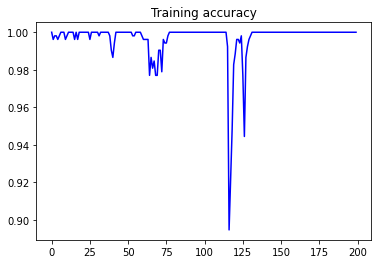

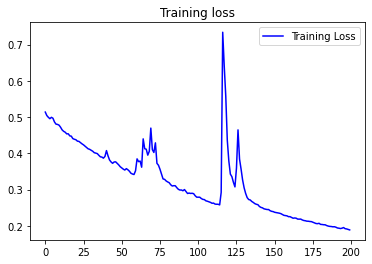

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Hanya kepadamu"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

with open('sonnet.txt','w') as f:
  f.write(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Hanya kepadamu suatu suatu suatu pegangan yang tak ternilai harganya bagiku butiran dan tetesan air matamu adalah mutiara yang berharga dalam hati benak jiwa dan ragaku apakah yang bisa ku lakukan untuk membalas semua kebaikanmu yang pernah memperjuangkan jiwa dan ragamu hanya karna engkau menginginkan aku barnafas didunia ini apa yang bisa ku perbuat untuk membayar segala perjuangan mu selama ini ibu kini engkau telah pergi meninggalkan aku apakah hanya dengan air mata apakah hanya dengan jeritan agar aku bisa membalas pengorbanan dan kesetianmu kepadaku ibu betapa engkau sangat menyayangi aku ketika engkau telah menutup mata katika aku tak melihat senyum manis


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b